In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df=pd.read_excel('GDP.xlsx',index_col='Date',parse_dates=True)

In [5]:
df.head()

,GDP
Date,
2004-06-01,1.193183e+07
2004-09-01,1.172184e+07
2004-12-01,1.306594e+07
2005-03-01,1.355801e+07
2005-06-01,1.303241e+07


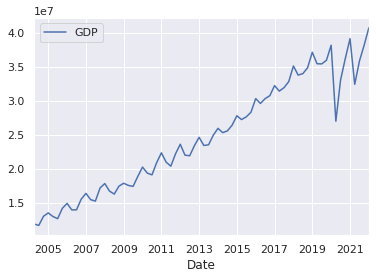

In [ ]:
df.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


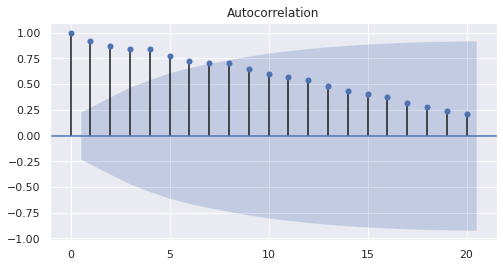

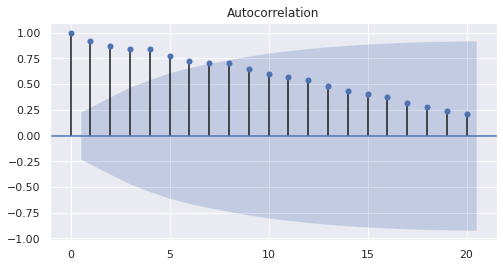

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(df['GDP'], lags=20, ax=ax)

In [7]:
df_train=df[:58]
df_test=df[58:]

In [8]:
from statsmodels.tsa.arima_model import ARIMA

# Creating ARIMA model---> AR(6)
mymodel = ARIMA(df_train['GDP'], order = (6, 0, 0))  
modelfit = mymodel.fit(disp = 0)  
print(modelfit.summary())  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                    GDP   No. Observations:                   58
Model:                     ARMA(6, 0)   Log Likelihood                -833.669
Method:                       css-mle   S.D. of innovations         370743.413
Date:                Fri, 15 Jul 2022   AIC                           1683.338
Time:                        16:31:44   BIC                           1699.822
Sample:                    06-01-2004   HQIC                          1689.759
                         - 09-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.198e+07    9.6e+06      2.289      0.026    3.16e+06    4.08e+07
ar.L1.GDP      0.9264      0.134      6.920      0.000       0.664       1.189
ar.L2.GDP      0.0403      0.138      0.293      0.7

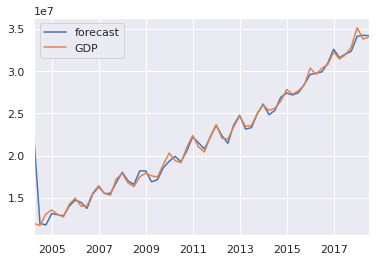

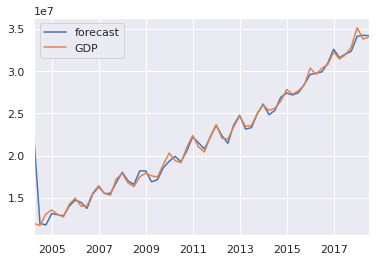

In [9]:
modelfit.plot_predict()

In [10]:
modelfit.forecast(14)[0]

array([34859117.1504238 , 36948189.24203074, 35648426.36110882,
       35720458.28891989, 36472336.21467557, 38354566.58961757,
       37084379.02921849, 37026421.30609831, 37705400.30000278,
       39394691.15689028, 38148118.99513175, 37971670.50811135,
       38577480.93187129, 40087719.42996611])

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

In [18]:
print("MSE: ",mean_squared_error(df_test['GDP'],list(modelfit.forecast(14)[0])))
print("MAE: ",mean_absolute_error(df_test['GDP'],list(modelfit.forecast(14)[0])))
print("MAPE: ",mean_absolute_percentage_error(df_test['GDP'],list(modelfit.forecast(14)[0])))
print("RMSE: ",np.sqrt(mean_squared_error(df_test['GDP'],list(modelfit.forecast(14)[0]))))

MSE:  11148145760159.764
MAE:  1838547.9684570965
MAPE:  0.059326582021732466
RMSE:  3338883.909356503
